Study the clustering module. Choose two different clustering algorithms from it (one algorithm must be explicitly ##parameterized by the number of clusters, and the second not). And two different clustering performance evaluation metrics (one #supervised and one ##unsupervised).

Choose any dataset for classification task. Make 3 plots of distribution of objects from the selected dataset colored according to their ground truth labels, and as result of clustering of the first and the second clustering algorithm. Try different parameters for clustering algorithms so that their results will be as close as possible to ground truth labels.

Plot how two selected clustering performance evaluation metrics depend on the number of clusters.


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
from sklearn import cluster

np.random.seed(5)

In [68]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## KMEAN

In [69]:
estimators = [('k_means_iris_3', KMeans(n_clusters=3))]

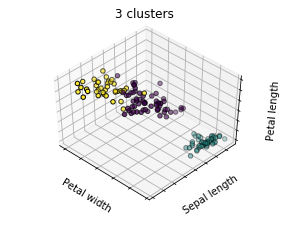

In [70]:
fignum = 1
titles = ['3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1

## Use another Data

In [71]:
digits = datasets.load_digits()
print(digits.keys)
print(digits.data)
print(digits.target)
print(digits.DESCR)

<built-in method keys of Bunch object at 0x1a1d4defb0>
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normali

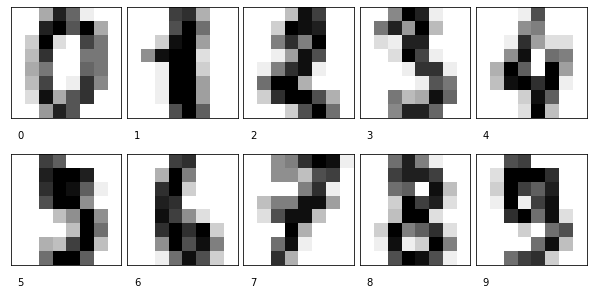

In [72]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    ax.text(0, 9, str(digits.target[i]))
plt.show()

In [73]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
randomized_pca = RandomizedPCA(n_components=2)
reduced_data_rpca = randomized_pca.fit_transform(digits.data)
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(digits.data)
print("Shape of reduced_data_pca:", reduced_data_pca.shape)
print("---")
print("RPCA:")
print(reduced_data_rpca)
print("---")
print("PCA:")
print(reduced_data_pca)

Shape of reduced_data_pca: (1797, 2)
---
RPCA:
[[ -1.25946384  21.27488321]
 [  7.95761434 -20.76871052]
 [  6.99191885  -9.95597906]
 ...
 [ 10.8012841   -6.9602483 ]
 [ -4.87209962  12.42394973]
 [ -0.34439304   6.36556316]]
---
PCA:
[[ -1.25946812  21.27488131]
 [  7.9576164  -20.76867656]
 [  6.99192203  -9.95599529]
 ...
 [ 10.8012784   -6.96027556]
 [ -4.87209622  12.42397312]
 [ -0.34439803   6.36551133]]


In [74]:
from sklearn.preprocessing import scale
datas = scale(digits.data) #scale() 方法將 digits 資料作標準化
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(datas, digits.target, digits.images, test_size=0.25, random_state=42)

In [75]:
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X_train, y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
# Apply the classifier to the test data, and view the accuracy score
print('Best score for training data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)

Best score for training data: 0.985894580549369
Best C: 1
Best kernel: rbf


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        44
           3       0.02      0.03      0.02        39
           4       0.00      0.00      0.00        45
           5       0.69      0.85      0.77        48
           6       0.00      0.00      0.00        43
           7       0.02      0.05      0.03        19
           8       0.29      0.10      0.15       107
           9       0.00      0.00      0.00         6

    accuracy                           0.12       450
   macro avg       0.10      0.10      0.10       450
weighted avg       0.15      0.12      0.12       450



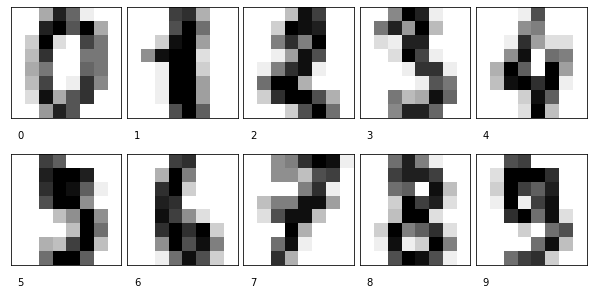

In [84]:
predicted = svc_model.predict(X_test)
images_and_predictions = list(zip(images_test, predicted))
fig2 = plt.figure(figsize=(8, 4))
fig2.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    ax = fig2.add_subplot(2, 5, index + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[index], cmap = plt.cm.binary)
    ax.text(0, 9, str(digits.target[index]))
plt.show()

In [95]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#print(confusion_matrix(y_test,y_pred))

print("Precision Score : ",precision_score(y_test, y_pred, pos_label = 'positive', average = 'micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label = 'positive', average = 'micro'))

Precision Score :  0.12
Recall Score :  0.12
